In [1]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
PGJ_input.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [3]:
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
Alcaldias_input

,NOMBRE,CLAVE_MUNICIPAL,CVE_ENTIDAD,CVEGEO,Geo Point,Geo Shape
0,Tlalpan,12,9,9012,"19.1983396763, -99.2062207957","{""type"": ""Polygon"", ""coordinates"": [[[-99.1962..."
1,Tláhuac,11,9,9011,"19.2769983772, -99.0028216137","{""type"": ""Polygon"", ""coordinates"": [[[-98.9789..."
2,Venustiano Carranza,17,9,9017,"19.4304954545, -99.0931057959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1089..."
3,Cuauhtémoc,15,9,9015,"19.4313734294, -99.1490557562","{""type"": ""Polygon"", ""coordinates"": [[[-99.1291..."
4,Iztapalapa,7,9,9007,"19.3491663204, -99.0567989642","{""type"": ""Polygon"", ""coordinates"": [[[-99.0581..."
5,Azcapotzalco,2,9,9002,"19.4853286147, -99.1821069423","{""type"": ""Polygon"", ""coordinates"": [[[-99.1823..."
6,Benito Juárez,14,9,9014,"19.3806424162, -99.1611346584","{""type"": ""Polygon"", ""coordinates"": [[[-99.1367..."
7,Cuajimalpa de Morelos,4,9,9004,"19.3246343001, -99.3107285253","{""type"": ""Polygon"", ""coordinates"": [[[-99.2569..."
8,Iztacalco,6,9,9006,"19.396911897, -99.094329797","{""type"": ""Polygon"", ""coordinates"": [[[-99.0558..."
9,Gustavo A. Madero,5,9,9005,"19.5040652077, -99.1158642087","{""type"": ""Polygon"", ""coordinates"": [[[-99.1185..."


In [4]:
PGJ_input["categoria_delito"].unique()

array(['DELITO DE BAJO IMPACTO',
       'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
       'ROBO A NEGOCIO CON VIOLENCIA', 'HECHO NO DELICTIVO',
       'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
       'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA', 'HOMICIDIO DOLOSO',
       'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
       'ROBO A CASA HABITACIÓN CON VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
       'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'VIOLACIÓN',
       'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
       'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA', 'SECUESTRO'],
      dtype=object)

In [5]:
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias=alcaldias.str.replace(".","")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [6]:
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
#PGJ_alcaldias

In [7]:
Primer_año=2016
Ultimo_año=2019

In [8]:
PGJ_base=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_base=PGJ_base.loc[PGJ_base["año_hechos"]<Ultimo_año+1,:]
PGJ_base.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2017.0,Junio,2017-06-19 10:00:00,ROBO A NEGOCIO SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-8,UI-1SD,BUENOS AIRES,CUAUHTEMOC,2017-06-19 13:46:37,Junio,2017,EJE 3 SUR,DOCTOR QUIROGA,-99.145673,19.406269,"19.406269303, -99.1456727623"
1,2016.0,Noviembre,2016-11-15 12:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN CUAUHTEMOC,CUH-4,UI-1SD,CUAUHTÉMOC,CUAUHTEMOC,2017-06-19 13:48:22,Junio,2017,AVENIDA PASEO DE LA REFORMA,NaN,-99.162689,19.429468,"19.4294676006, -99.1626885107"
2,2017.0,Junio,2017-06-19 05:00:00,ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLALPAN,TLP-2,UI-1CD,MESA DE LOS HORNOS,TLALPAN,2017-06-19 13:52:15,Junio,2017,AHUACTEPEC,NaN,-99.184597,19.278135,"19.2781350645, -99.1845967763"
3,2017.0,Junio,2017-06-19 06:00:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-4,UI-1SD,TACUBAYA,MIGUEL HIDALGO,2017-06-19 13:58:31,Junio,2017,AV. JALISCO,ANILLO PERIFERICO,-99.189690,19.398010,"19.3980098652, -99.1896899072"
4,2017.0,Marzo,2017-03-13 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-2,UI-1SD,SAN MARCOS NORTE,XOCHIMILCO,2017-06-19 14:11:16,Junio,2017,GUADALUPE I. RAMÍREZ,PROLONGACIÓN GUADALUPE I. RAMÍREZ,-99.114178,19.265863,"19.2658632688, -99.1141782469"


In [9]:
PGJ_Tipo_Delito=PGJ_base.groupby(["año_hechos","categoria_delito","alcaldia_hechos"]).count()
PGJ_Tipo_Delito=PGJ_Tipo_Delito["delito"]
#PGJ_Tipo_Delito.head()

In [10]:
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top30_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top30_2018=(PGJ_Top30_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top30_2018=PGJ_Top30_2018["delito"]
#PGJ_Top30_2018.tolist()

In [11]:
PGJ_2016=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2016,:]
PGJ_2017=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2017,:]
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_2019=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2019,:]
#PGJ_2016.head()

In [12]:
PGJ_Top_Delitos_2016=PGJ_2016.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2017=PGJ_2017.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2018=PGJ_2018.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]
PGJ_Top_Delitos_2019=PGJ_2019.loc[PGJ_input["delito"].isin(PGJ_Top30_2018),:]

#alcaldias_2017=PGJ_Top_2017.groupby(["alcaldia_hechos"]).count()
#alcaldias_2017
#PGJ_Top_Delitos_2019

In [65]:
Delitos_Alcaldia_2016 = PGJ_Top_Delitos_2016.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2016
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016['delito'].reset_index()
Delitos_Alcaldia_2016_Resume = Delitos_Alcaldia_2016_Resume.rename(columns = {"delito":"Delitos_2016"})
Delitos_Alcaldia_2016_Resume_df = pd.DataFrame(Delitos_Alcaldia_2016_Resume)
#Delitos_Alcaldia_2016_Resume_df

In [30]:
Total_Delitos_2016 = Delitos_Alcaldia_2016["delito"].sum()
Total_Delitos_2016

149532

In [45]:
Delitos_Alcaldia_2017 = PGJ_Top_Delitos_2017.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2017
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017['delito'].reset_index()
Delitos_Alcaldia_2017_Resume = Delitos_Alcaldia_2017_Resume.rename(columns = {"delito":"Delitos_2017"})
Delitos_Alcaldia_2017_Resume_df = pd.DataFrame(Delitos_Alcaldia_2017_Resume)
#Delitos_Alcaldia_2017_Resume_df

In [46]:
total_delitos_2017 = Delitos_Alcaldia_2017["delito"].sum()
total_delitos_2017

178743

In [47]:
Delitos_Alcaldia_2018 = PGJ_Top_Delitos_2018.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2018
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018['delito'].reset_index()
Delitos_Alcaldia_2018_Resume = Delitos_Alcaldia_2018_Resume.rename(columns = {"delito":"Delitos_2018"})
Delitos_Alcaldia_2018_Resume_df = pd.DataFrame(Delitos_Alcaldia_2018_Resume)
#Delitos_Alcaldia_2018_Resume_df

In [48]:
total_delitos_2018 = Delitos_Alcaldia_2018["delito"].sum()
total_delitos_2018

198627

In [49]:
Delitos_Alcaldia_2019 = PGJ_Top_Delitos_2019.groupby("alcaldia_hechos").count()
Delitos_Alcaldia_2019
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019['delito'].reset_index()
Delitos_Alcaldia_2019_Resume = Delitos_Alcaldia_2019_Resume.rename(columns = {"delito":"Delitos_2019"})
Delitos_Alcaldia_2019_Resume_df = pd.DataFrame(Delitos_Alcaldia_2019_Resume)
#Delitos_Alcaldia_2019_Resume_df

In [50]:
total_delitos_2019 = Delitos_Alcaldia_2019["delito"].sum()
total_delitos_2019

69182

In [51]:
años_total = {"Total delitos" : {'2016':total_delitos_2016,
           '2017':total_delitos_2017,
           '2018':total_delitos_2018,
              '2019':total_delitos_2019}}

In [52]:
años_total_df = pd.DataFrame(años_total)
años_total_df

,Total delitos
2016,149532
2017,178743
2018,198627
2019,69182


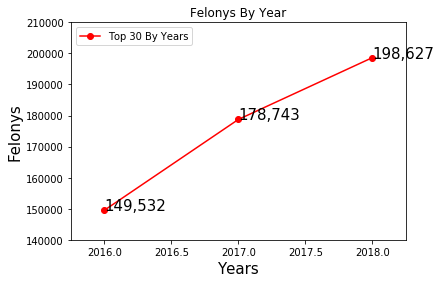

In [66]:
x_axis = np.arange(2016,2019,1)
points = [149532, 178743, 198627]
Delitos_año = plt.plot(x_axis,points, color = "red", marker ="o", label = "Top 30 By Years")

plt.legend(loc="upper left", fontsize=10)
plt.ylabel('Felonys', fontsize = 15)
plt.xlabel('Years', fontsize = 15)
plt.title("Felonys By Year")
plt.annotate('149,532', xy=(2016, 149532), fontsize= 15)             
plt.annotate('178,743', xy=(2017, 178743), fontsize= 15) 
plt.annotate('198,627', xy=(2018, 198627), fontsize= 15)
plt.ylim(140000,210000)
plt.xlim(2015.75,2018.25)

plt.savefig('años_total_df.png', bbox_inches='tight')

plt.show()
     

In [67]:
Merge_Table1 = pd.merge(Delitos_Alcaldia_2016_Resume_df, Delitos_Alcaldia_2017_Resume_df, 
                        on ="alcaldia_hechos")
#Merge_Table1.head()

In [68]:
Merge_Table2 = pd.merge(Merge_Table1, Delitos_Alcaldia_2018_Resume_df, 
                        on ="alcaldia_hechos")
#Merge_Table2.head()

In [69]:
Merge_Alcaldias= pd.merge(Merge_Table2, Delitos_Alcaldia_2019_Resume_df, on = "alcaldia_hechos")
Merge_Alcaldias

,alcaldia_hechos,Delitos_2016,Delitos_2017,Delitos_2018,Delitos_2019
0,ALVARO OBREGON,9964,11668,13757,5362
1,AZCAPOTZALCO,7918,9274,9974,3311
2,BENITO JUAREZ,13699,17023,18853,6186
3,COYOACAN,11164,12704,14076,4659
4,CUAJIMALPA DE MORELOS,2141,2345,2690,1077
5,CUAUHTEMOC,23669,27887,30784,9975
6,GUSTAVO A MADERO,14063,17868,19675,7045
7,IZTACALCO,6371,7812,8820,3081
8,IZTAPALAPA,22160,26073,28709,10323
9,LA MAGDALENA CONTRERAS,2431,2632,2890,1268


In [43]:
export_csv = merge_alcaldias.to_csv ("Delitos Por Año.csv")

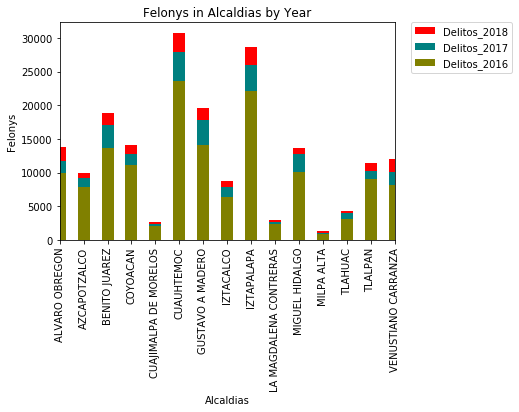

In [62]:
ax = plt.gca()

merge_table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2018', color='red', ax=ax)
merge_table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2017', color='teal', ax=ax)
merge_table2.plot(kind='bar',x='alcaldia_hechos',y='Delitos_2016',color='olive', ax=ax)



plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(x='alcaldia_hechos', rotation='vertical')
plt.title("Felonys in Alcaldias by Year")
plt.xlim(0,14)
plt.xlabel("Alcaldias")
plt.ylabel("Felonys")
plt.savefig('merge_table2.png', bbox_inches='tight')


plt.show()

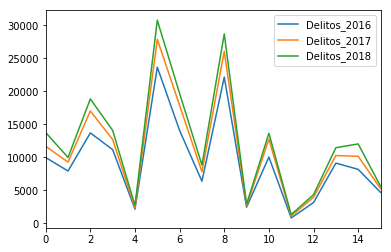

In [29]:
count_chart = merge_table2.plot(kind='line')